In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

data = []
paths = []
result = []

for r, d, f in os.walk(r'D:\\Education\\Research Paper for Masters\\Brain Dataset\\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"D:\\Education\\Research Paper for Masters\\Brain Dataset\\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())       


data = np.array(data)
data.shape

(2892, 128, 128, 3)

In [5]:
result = np.array(result)
len(result)
result = result.reshape(2892,2)
print(result)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.1, shuffle=True, random_state=0)

In [7]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeUniform

import tensorflow as tf

model = Sequential()
activation = 'relu'
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation = activation, padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation = activation, padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation = activation, padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(2 ,activation ='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])
#print(model.summary())


y_train.shape

history = model.fit(x_train, y_train, epochs = 11, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/11
66/66 [==============================] - 95s 1s/step - loss: 8.4400 - accuracy: 0.7855 - val_loss: 0.8146 - val_accuracy: 0.8276
Epoch 2/11
66/66 [==============================] - 93s 1s/step - loss: 0.5176 - accuracy: 0.8751 - val_loss: 0.7472 - val_accuracy: 0.8724
Epoch 3/11
66/66 [==============================] - 91s 1s/step - loss: 0.2451 - accuracy: 0.9435 - val_loss: 0.4954 - val_accuracy: 0.8759
Epoch 4/11
66/66 [==============================] - 91s 1s/step - loss: 0.1355 - accuracy: 0.9727 - val_loss: 0.3287 - val_accuracy: 0.9414
Epoch 5/11
66/66 [==============================] - 91s 1s/step - loss: 0.0775 - accuracy: 0.9862 - val_loss: 0.9868 - val_accuracy: 0.8690
Epoch 6/11
66/66 [==============================] - 93s 1s/step - loss: 0.0395 - accuracy: 0.9885 - val_loss: 0.7207 - val_accuracy: 0.8828
Epoch 7/11
66/66 [==============================] - 90s 1s/step - loss: 0.0949 - accuracy: 0.9842 - val_loss: 0.3719 - val_accuracy: 0.9517
Epoch 8/11
66/66 [==

In [8]:
def names(number):
    if number==0:
        return 'it has  a Tumor'
        a==1
    else:
        return 'there are no tumor'
        a==0

99.99985694885254% Confidence it has  a Tumor


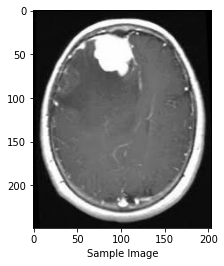

In [9]:
import matplotlib.pyplot as plt
img = Image.open(r"D:\\Education\\Research Paper for Masters\\Brain Dataset\\pred\\pred7.jpg")
plt.xlabel('Sample Image')
plt.imshow(img)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]

print(str(res[0][0]*100) + '% Confidence ' + names(classification))

In [10]:
print(model.evaluate(x_test, y_test))

10/10 [==============================] - 1s 135ms/step - loss: 0.2990 - accuracy: 0.9724
[0.29904812574386597, 0.9724137783050537]


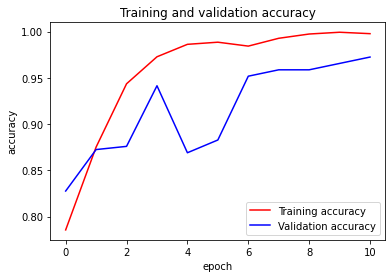

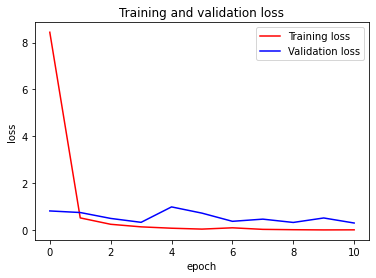

In [11]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [12]:
model.evaluate(x_train, y_train)


#print("[INFO] Loss: {}".format(eval_loss))


82/82 [==============================] - 12s 147ms/step - loss: 0.0138 - accuracy: 0.9954


[0.013808266259729862, 0.9953881502151489]

In [13]:
acc[10]*100 #accuracy %

99.76940751075745

In [17]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(x_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

ValueError: multilabel-indicator format is not supported

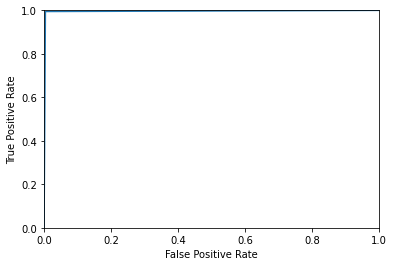

In [33]:
a= model.predict(x_train)
from sklearn.metrics import roc_curve

b=np.argmax(a,axis=1)

fpr , tpr , thresholds = roc_curve(y_train.argmax(axis =1) , b)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [15]:
print(history)